<a href="https://colab.research.google.com/github/OmarovaJuma/AI.MO/blob/main/Lr7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Выполнила работу Омарова Джума группа ПИН-б-о-22-1**

# **Лабораторная работа 7. Разработка единого шаблона предварительной обработки данных**

# **Первичнынй анализ**

Описание набора данных:
Набор данных "Online Food Dataset" содержит информацию, собранную с онлайн-платформы по заказам еды. В нем содержатся различные атрибуты, связанные с демографической информацией, местоположением и деталями заказов.

---

Описание признаков:

Возраст: Возраст клиента (числовой).

Пол: Пол клиента (категориальный: Мужчина, Женщина, Другой).

Семейное положение: Семейное положение клиента (категориальный: Холост, Замужем/Женат, Разведен(а), Вдовец/Вдова, Другое).

Занятость: Занятость клиента (категориальный: различные занятия).

Ежемесячный доход: Ежемесячный доход клиента (числовой).

Образование: Образование клиента (категориальный: Среднее образование, Бакалавр, Магистр, Доктор наук, Другое).

Размер семьи: Количество людей в семье клиента (числовой).

Широта: Широта местоположения клиента (числовой).

Долгота: Долгота местоположения клиента (числовой).

Почтовый индекс: Почтовый индекс местоположения клиента (числовой).

Статус: Текущий статус заказа (категориальный: Ожидает подтверждения, Подтвержден, Доставлен).

Отзыв: Обратная связь, предоставленная клиентом после получения заказа (категориальный: Положительный, Отрицательный, Нейтральный).

---

Возможные модели и применения:

Анализ рынка: Понимание демографических тенденций и предпочтений в онлайн-заказах еды.

Улучшение качества обслуживания: Анализ обратной связи для улучшения качества обслуживания и удовлетворенности клиентов.

Прогностическое моделирование: Прогнозирование предпочтений или поведения клиентов на основе демографических и местоположенческих атрибутов.

---

Форма набора данных:

Количество записей: 388
Количество признаков: 12
Пропущенные значения: Нет

### Статистические показатели

In [ ]:
# Рассчитать статистические показатели
stats = dataset.describe()

# Вывести статистические показатели
print(stats)

              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


numpy (импортируется как np) - библиотека для выполнения математических операций, особенно с массивами и матрицами.

matplotlib.pyplot (импортируется как plt) - библиотека для создания статических, интерактивных и анимированных визуализаций в Python.

pandas (импортируется как pd) - библиотека для обработки и анализа данных, предоставляющая удобные структуры данных и операции для манипуляции данными.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Загрузка данных: Код загружает данные из CSV-файла "onlinefoods.csv" в объект DataFrame с помощью библиотеки pandas. Этот шаг позволяет начать работу с данными, которые будут использоваться для анализа.

In [ ]:
dataset = pd.read_csv("dataset/onlinefoods.csv")

dataset

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


X = dataset.iloc[:, :-1].values: Создает матрицу признаков X путем выбора всех строк и всех столбцов, кроме последнего столбца, из DataFrame dataset. Здесь предполагается, что последний столбец содержит зависимую переменную. Этот шаг разделяет данные на матрицу признаков, которая содержит независимые переменные, которые будут использоваться для прогнозирования, и вектор целевой переменной.

y = dataset.iloc[:, -1].values: Создает вектор зависимой переменной y, выбирая все строки и последний столбец из DataFrame dataset. Этот шаг выделяет только зависимую переменную из данных.

print("Матрица признаков"); print(X): Выводит на экран строку "Матрица признаков" и затем матрицу признаков X.

print("Зависимая переменная"); print(y): Выводит на экран строку "Зависимая переменная" и затем вектор зависимой переменной y.

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print("Матрица признаков"); print(X)
print("Зависимая переменная"); print(y)

Матрица признаков
[[20 'Female' 'Single' ... 560001 'Yes' 'Positive']
 [24 'Female' 'Single' ... 560009 'Yes' 'Positive']
 [22 'Male' 'Single' ... 560017 'Yes' 'Negative ']
 ...
 [22 'Female' 'Single' ... 560010 'Yes' 'Positive']
 [23 'Male' 'Single' ... 560009 'Yes' 'Positive']
 [23 'Male' 'Single' ... 560078 'Yes' 'Positive']]
Зависимая переменная
['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'N

plt.hist(dataset['Age'], bins=20): Создает гистограмму распределения возраста из столбца "Age" в DataFrame dataset. Параметр bins=20 указывает, что данные будут разделены на 20 интервалов (колонок).

plt.title('Age Distribution'): Задает заголовок графика "Распределение возраста".

plt.xlabel('Age'): Задает подпись для оси x как "Возраст".

plt.ylabel('Frequency'): Задает подпись для оси y как "Частота".

plt.show(): Отображает график.

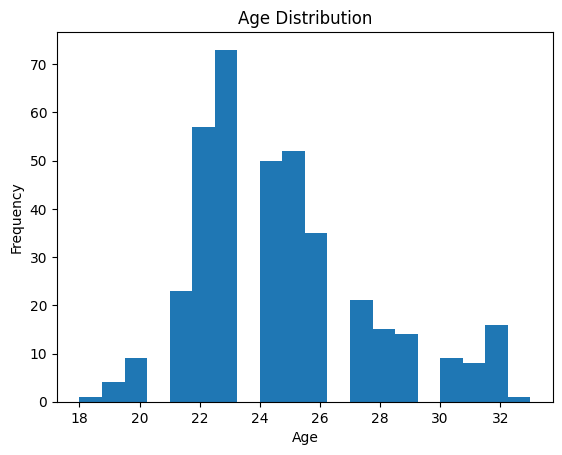

In [ ]:
# Визуализация данных
# Посмотрим на распределение возраста
plt.hist(dataset['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

dataset.isnull(): Этот метод проверяет каждое значение в DataFrame dataset на наличие пропущенных значений. Он возвращает DataFrame с теми же размерами, что и исходный DataFrame, но со значениями True для пропущенных значений и False для непропущенных значений.

sum(): Этот метод вызывается после isnull() и вычисляет сумму значений True по каждому столбцу. Поскольку в Python True интерпретируется как 1, а False как 0, эта операция фактически суммирует количество пропущенных значений в каждом столбце.

print(): Этот метод выводит результат на экран.

In [ ]:
# Обработка пропущенных значений
# Проверим, есть ли пропущенные значения в данных
print(dataset.isnull().sum())

Age                                         0
Monthly Income                              0
Family size                                 0
latitude                                    0
longitude                                   0
Pin code                                    0
Unnamed: 12                                 0
Gender_Female                               0
Gender_Male                                 0
Marital Status_Married                      0
Marital Status_Prefer not to say            0
Marital Status_Single                       0
Occupation_Employee                         0
Occupation_House wife                       0
Occupation_Self Employeed                   0
Occupation_Student                          0
Educational Qualifications_Graduate         0
Educational Qualifications_Ph.D             0
Educational Qualifications_Post Graduate    0
Educational Qualifications_School           0
Educational Qualifications_Uneducated       0
Output_No                         

from sklearn.preprocessing import LabelEncoder: Эта строка импортирует класс LabelEncoder из модуля sklearn.preprocessing. LabelEncoder используется для преобразования категориальных значений в числовые.

labelencoder_y = LabelEncoder(): Создается экземпляр класса LabelEncoder под именем labelencoder_y.

print('Зависимая переменная до обработки') и print(y): Эти строки выводят на экран значения зависимой переменной y до преобразования.

y = labelencoder_y.fit_transform(y): Этот вызов метода fit_transform() применяет преобразование категориальных значений в y в числовые. Метод fit_transform() сначала "обучает" LabelEncoder на данных, а затем применяет преобразование. Преобразованные значения сохраняются в переменной y.

print('Зависимая переменная после обработки') и print(y): Эти строки выводят на экран значения зависимой переменной y после преобразования.

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder_y = LabelEncoder()
print('Зависимая переменная до обработки')
print(y)
y = labelencoder_y.fit_transform(y)
print('Зависимая переменная после обрабокти')
print(y)

Зависимая переменная до обработки
['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'No' 'Yes

from sklearn.preprocessing import OneHotEncoder: Импортируется класс OneHotEncoder для выполнения кодирования one-hot.

from sklearn.compose import ColumnTransformer: Импортируется класс ColumnTransformer, который позволяет применять преобразования к столбцам данных.

from sklearn.preprocessing import LabelEncoder: Импортируется LabelEncoder для кодирования категориальных признаков в числовые значения.

labelencoder_X = LabelEncoder(): Создается экземпляр класса LabelEncoder под именем labelencoder_X.

X[:, 0] = labelencoder_X.fit_transform(X[:, 0]): Применяется LabelEncoder к первому столбцу (X[:, 0]) массива X. Он кодирует категориальные значения в числовые.

ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [0])], remainder='passthrough'): Создается экземпляр класса ColumnTransformer. В нем определяется, что OneHotEncoder должен применяться к первому столбцу (индекс 0) массива X. remainder='passthrough' гарантирует, что все остальные столбцы остаются без изменений.

X = ct.fit_transform(X): Применяется преобразование к массиву X, кодируя категориальные значения первого столбца с помощью one-hot кодирования.

print("One-hot encoded функция:") и print(X): Выводится результат one-hot кодирования.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

# Предполагая, что X содержит ваш категориальный признак в первом столбце
# Если X - это фрейм данных pandas, вы можете преобразовать его в массив numpy, используя значения X.
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

# Использование ColumnTransformer для применения OneHotEncoder к указанному столбцу
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],
    remainder='passthrough'
)

X = ct.fit_transform(X)
print("One-hot encoded функция:")
print(X)

One-hot encoded функция:
[[1.0 0.0 0.0 ... True False True]
 [1.0 0.0 0.0 ... True False True]
 [1.0 0.0 0.0 ... True True False]
 ...
 [1.0 0.0 0.0 ... True False True]
 [1.0 0.0 0.0 ... True False True]
 [1.0 0.0 0.0 ... True False True]]


from sklearn.model_selection import train_test_split: Импортируется функция train_test_split, которая используется для разделения данных на тренировочную и тестовую выборки.

X = dataset.drop(columns=['Unnamed: 12']) и y = dataset['Unnamed: 12']: Переменной X присваиваются все столбцы из исходного набора данных dataset, за исключением столбца с именем 'Unnamed: 12', который предполагается зависимой переменной y. В переменную y записываются значения из столбца 'Unnamed: 12'.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): Применяется функция train_test_split, чтобы разделить данные на тренировочные и тестовые наборы. Параметр test_size=0.2 указывает на размер тестовой выборки (в данном случае 20% от общего числа данных), а random_state=42 используется для генерации псевдослучайных чисел для воспроизводимости разделения данных.

print("Размер тренировочной выборки:", X_train.shape) и print("Размер тестовой выборки:", X_test.shape): Выводится размер тренировочной и тестовой выборок, чтобы убедиться, что разделение прошло успешно.

In [ ]:
# Разделение выборки на тестовую и тренировочную
from sklearn.model_selection import train_test_split
X = dataset.drop(columns=['Unnamed: 12'])
y = dataset['Unnamed: 12']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вывод размеров тренировочной и тестовой выборок
print("Размер тренировочной выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер тренировочной выборки: (310, 24)
Размер тестовой выборки: (78, 24)


## **Вывод**

Загрузка данных из файла CSV в объект DataFrame с использованием библиотеки Pandas.

Разделение данных на матрицу признаков (X) и зависимую переменную (y).

Обработка пропущенных значений с помощью метода isnull().sum(), который выводит количество пропущенных значений для каждого признака.

Преобразование категориальных признаков в числовые с помощью LabelEncoder.

Применение кодирования One-Hot с использованием OneHotEncoder и ColumnTransformer для обработки категориальных признаков.

Разделение данных на тренировочную и тестовую выборки с помощью train_test_split из библиотеки scikit-learn.

Эти шаги помогают подготовить данные для обучения моделей машинного обучения, учитывая особенности работы алгоритмов с числовыми данными и необходимость избавления от пропущенных значений. Код демонстрирует хорошее понимание процесса предобработки данных и применение различных инструментов для достижения этой цели.



### 1. Почему при реализации многомерной линейной регрессии необходимо добавить фиктивный признак с единственным значением 1.0?

Добавление фиктивного признака с единственным значением 1.0 (так называемый **свободный член** или **интерсепт**) необходимо для того, чтобы модель могла учитывать постоянное смещение (или интерсепт) в зависимости. Без этого признака модель будет вынуждена проходить через начало координат, что может привести к неадекватному описанию данных. Этот признак позволяет модели лучше подстраиваться под данные и улучшает качество предсказаний.

### 2. Что такое фиктивная переменная? Поясните причину удаления одной фиктивной переменной, возникающей при перекодировке категориального признака.

**Фиктивная переменная** (или **dummy variable**) — это бинарная переменная, используемая для представления категориальных данных в числовом формате. Каждая категория кодируется как отдельная переменная, принимающая значения 0 или 1.

При перекодировке категориального признака с \( n \) категориями создается \( n \) фиктивных переменных. Однако одну из них обычно удаляют, чтобы избежать **мультиколлинеарности**. Это происходит потому, что наличие всех \( n \) фиктивных переменных приводит к линейной зависимости между ними, что может исказить результаты регрессии.

### 3. На основе какого критерия можно выбирать удаляемый признак в алгоритме back elimination?

В алгоритме **back elimination** удаляемый признак обычно выбирается на основе **p-значения**. Признак с наибольшим p-значением (который превышает заданный уровень значимости, например, 0.05) считается наименее значимым и подлежит удалению. Этот процесс продолжается до тех пор, пока все оставшиеся признаки не будут статистически значимыми.

### 4. В чем заключается алгоритм all-in regression?

Алгоритм **all-in regression** заключается в том, что все доступные признаки включаются в модель с самого начала. Затем используется метод оценки, такой как AIC (Akaike Information Criterion) или BIC (Bayesian Information Criterion), для выбора наилучшей модели. Этот подход позволяет оценить, какие признаки действительно важны, и исключить менее значимые на основе выбранного критерия.

### 5. В чем заключается алгоритм forward selection regression?

Алгоритм **forward selection regression** — это метод выбора признаков, который начинается с пустой модели и последовательно добавляет признаки. На каждом шаге выбирается признак, который максимально улучшает модель (например, минимизирует ошибку или максимизирует \( R^2 \)). Процесс продолжается до тех пор, пока добавление новых признаков не приведет к значительному улучшению модели.

### 6. В чем заключается алгоритм Bidirectional Elimination?

Алгоритм **Bidirectional Elimination** (двунаправленное исключение) сочетает в себе элементы как **forward selection**, так и **backward elimination**. Он начинает с пустой модели и добавляет признаки, как в forward selection, но также проверяет, не следует ли удалить уже добавленные признаки на основе их значимости. Этот процесс продолжается до тех пор, пока не будет достигнута оптимальная модель, которая включает только значимые признаки.

### 7. Стратегия Backward Elimination предполагает удаление признаков на основе анализа p-критерия. Как реализовать удаление признаков в автоматическом режиме?

Для автоматизации удаления признаков в стратегии **Backward Elimination** можно использовать следующий подход:

1. **Цикл**: Создайте цикл, который будет выполняться до тех пор, пока есть признаки для удаления.
2. **Расчет p-значений**: На каждой итерации вычисляйте p-значения для всех признаков в модели.
3. **Удаление**: Удаляйте признак с наибольшим p-значением, если оно превышает установленный уровень значимости.
4. **Проверка**: Повторяйте процесс до тех пор, пока все оставшиеся признаки не будут статистически значимыми.

Этот процесс можно реализовать с помощью библиотек, таких как `statsmodels` в Python, которые позволяют легко получать p-значения для признаков в модели.